# Transitions in the Harmonic Oscillator

In [1]:
using PyPlot

## Hermite Polynomials

$$
H_n(z)=(-1)^n~ e^{z^2}\frac{d^n}{dz^n}\left(e^{-z^2}\right)
$$

* The first eleven physicists' Hermite polynomials are:
$$
\begin{align}
H_0(x) &= 1, \\
H_1(x) &= 2x, \\
H_2(x) &= 4x^2 - 2, \\
H_3(x) &= 8x^3 - 12x, \\
H_4(x) &= 16x^4 - 48x^2 + 12, \\
H_5(x) &= 32x^5 - 160x^3 + 120x, \\
H_6(x) &= 64x^6 - 480x^4 + 720x^2 - 120, \\
H_7(x) &= 128x^7 - 1344x^5 + 3360x^3 - 1680x, \\
H_8(x) &= 256x^8 - 3584x^6 + 13440x^4 - 13440x^2 + 1680, \\
H_9(x) &= 512x^9 - 9216x^7 + 48384x^5 - 80640x^3 + 30240x, \\
H_{10}(x) &= 1024x^{10} - 23040x^8 + 161280x^6 - 403200x^4 + 302400x^2 - 30240.
\end{align}
$$

In [2]:
function hermite(x, n)
    if n == 0
        return 1
    elseif n == 1
        return 2x
    elseif n == 2
        return 4x.^2 - 2
    elseif n == 3
        return 8x.^3 - 12x
    elseif n == 4
        return 16x.^4 - 48x.^2 + 12
    else
        return nothing
    end
end

hermite (generic function with 1 method)

## Harmonic Oscillator Wave Functions

$$
\psi_n(x) = \frac{1}{\sqrt{2^n\,n!}} \cdot \left(\frac{m\omega}{\pi \hbar}\right)^{1/4} \cdot e^{
- \frac{m\omega x^2}{2 \hbar}} \cdot H_n\left(\sqrt{\frac{m\omega}{\hbar}} x \right), \qquad n = 0,1,2,\ldots
$$

In [3]:
function ψ(x, n)
     ħ = 1.0
     m = 1.0
     ω = 1.0
    @. 1 / sqrt(2^n * factorial(n)) * (m * ω / (π * ħ))^(1/4) * exp(-m * ω * x^2 / (2ħ)) * hermite(sqrt(m * ω / ħ)x, n)
end

ψ (generic function with 1 method)

In [4]:
μ(ψ, x) = ψ .* x

μ (generic function with 1 method)

In [11]:
x = range(-4.5, 4.4, length=512)
Ψ = Array{Float64}(undef,4, 512)

for n = 0:size(Ψ, 1)-1
    Ψ[n+1,:] = ψ(x, n)
end

## Single Transitions

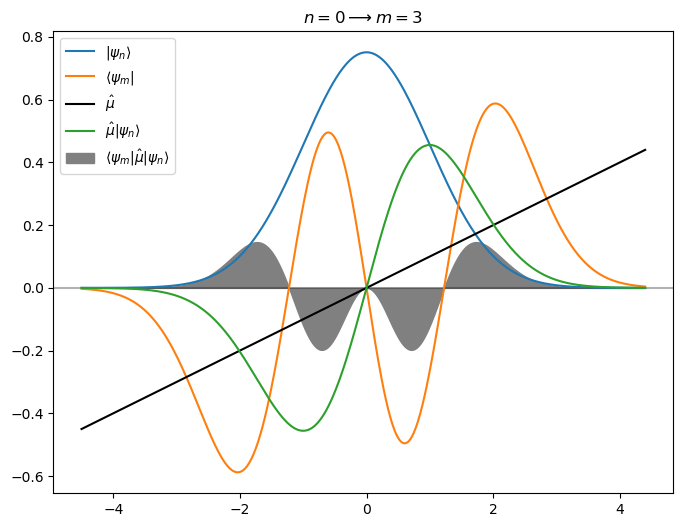

PyObject <matplotlib.legend.Legend object at 0x147564b38>

In [74]:
# from vibrational state
n = 0
# to vibrational state
m = 3

figure(figsize=(8,6))
title(latexstring("n = $n \\longrightarrow m = $m"))
axhline(0, color=:black, alpha=0.3)

### Ground State ###
plot(x, ψ(x,n), label=L"| \psi_n \rangle")
### Excited State ###
plot(x, ψ(x,m), label=L"\langle \psi_m |")
### Dipole Operator ###
plot(x, μ(0.1, x), color=:black, label=L"\hat{\mu}")
### Dipole Operator Applied on Ground State ###
plot(x, μ(ψ(x,n), x), label=L"\hat{\mu}| \psi_n \rangle")
### Overlap Integral ###
fill_between(x, ψ(x,m) .* μ(ψ(x,n), x), label=L"\langle \psi_m | \hat{\mu}| \psi_n \rangle", color=:grey)

legend()

## Multiple Transittions

0 => 1: 40.599051736891745
0 => 2: -9.444200293600213e-7
0 => 3: -8.339079019602696e-6
1 => 2: 57.415715142090704
1 => 3: -2.0497908771092494e-5


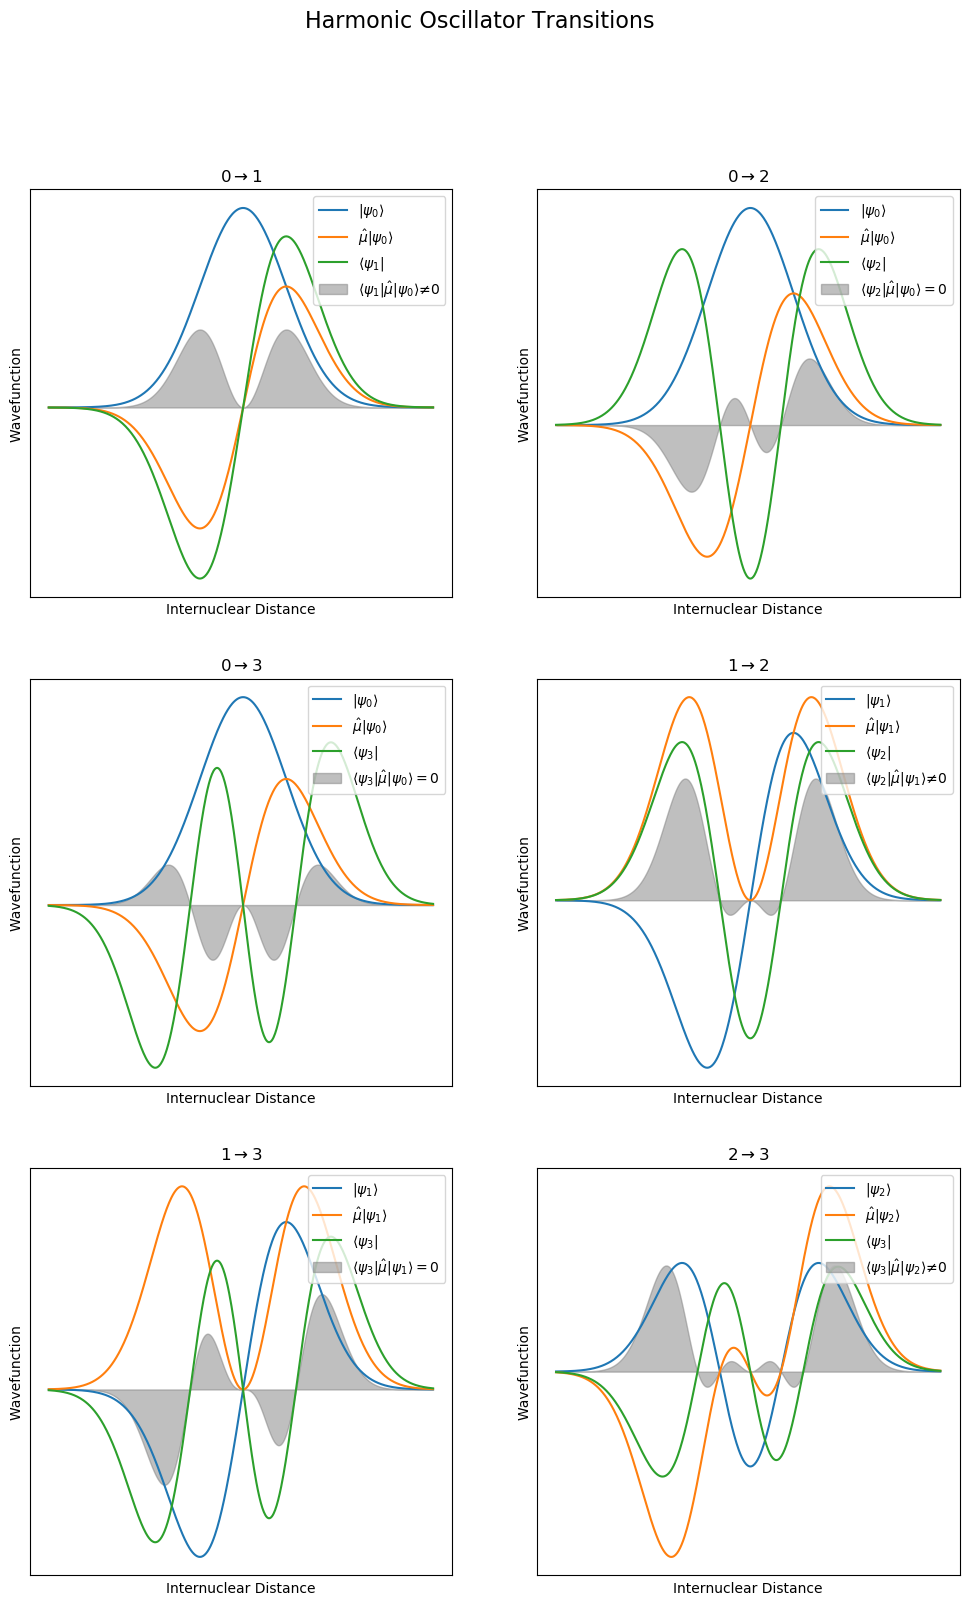

2 => 3: 70.31938200209181


In [32]:
pygui(false)
figure(figsize=(12, 18))
suptitle("Harmonic Oscillator Transitions", fontsize=16)
sp = 1
for i = 1:size(Ψ, 1)-1
    n = i - 1
    for j = i+1:size(Ψ, 1)
        subplot(3, 2, sp)
        m = j - 1
        plot(x, Ψ[i,:], label=latexstring("|\\psi_$n \\rangle"))
        plot(x, μ(Ψ[i,:], x), label=latexstring("\\hat{\\mu} |\\psi_$n \\rangle"))
        plot(x, Ψ[j,:], label=latexstring("\\langle \\psi_$m |"))
        ϕ = μ(Ψ[i,:], x) .* Ψ[j,:]
        if round(sum(ϕ)) == 0
            labstr = " = 0"
        else
            labstr = " \\ne 0"
        end
        println("$n => $m: $(sum(ϕ))")
        fill_between(x, 0, μ(Ψ[i,:], x) .* Ψ[j,:], 
           label=latexstring("\\langle \\psi_$m | \\hat{\\mu} |\\psi_$n \\rangle" * labstr), 
           color="grey", alpha=0.5)
        legend(loc=1)
        
        title(latexstring("\$$n \\rightarrow $m\$"))
        xlabel("Internuclear Distance")
        ylabel("Wavefunction")
        
        # Hide ticks
        gca().xaxis.set_ticks([])
        gca().yaxis.set_ticks([])
        
        sp += 1
    end
end